# INTRODUCTION

# Importation et compréhension des données :


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re,string,unicodedata

%matplotlib inline

In [12]:
import spacy
import spacy.cli
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

#downloading wordnet/punkt dictionary
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
%pip install afinn
from afinn import Afinn

In [14]:
import pandas as pd
data = pd.read_csv(r'C:\Users\user\Downloads\datasets_521477_958075_iran.csv')
data.head()

,Comments,label
0,How to stop the war Stop the media escalating it,1
1,WW1 : History Books WW2 : History Books WW3 : ...,1
2,Let the politicians go to war and soldiers tak...,1
3,We'll be praying for the peace of everyone.......,1
4,We are praying that this won't go too far. Ble...,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  526 non-null    object
 1   label     527 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


# On fera une analyse puis du Data Cleaning sur la base de données

### Shape est un tuple qui nous donne une indication du nombre de dimensions dans le tableau

In [16]:
data.shape

(527, 2)

### On cherche les valeurs nulles et les manquantes

In [17]:
data.isna().sum()

Comments    1
label       0
dtype: int64

### suppression de l'index avec des commentaires manquants

In [18]:
data = data.dropna()
data.shape

(526, 2)

### La création d'une nouvelle colonne dans la data pour le nombre de mots

In [19]:
data ['word_count'] = data['Comments'].apply(lambda x:len(str(x).split(" ")))

### Visualiser les 5 premières lignes :


In [20]:
data.head()

,Comments,label,word_count
0,How to stop the war Stop the media escalating it,1,10
1,WW1 : History Books WW2 : History Books WW3 : ...,1,12
2,Let the politicians go to war and soldiers tak...,1,12
3,We'll be praying for the peace of everyone.......,1,9
4,We are praying that this won't go too far. Ble...,1,14


### On fait une copie pour la data apres le petit nettoyage 

In [21]:
data_clean = data.copy()

## PREPARATION DE LA DATA : 

Rendre le tout en miniscule 

In [22]:
data_clean['Comments'] = data_clean['Comments'].str.lower()

Suppression des espaces au debut 

In [23]:
data_clean['Comments'] = data_clean['Comments'].str.strip()

Suppression des ponctuations

In [24]:
from string import punctuation

def remove_punct(text):
  for punctuations in punctuation:
    text = text.replace(punctuations, '')
  return text

#apply to the dataset
data_clean['Comments'] = data_clean['Comments'].apply(remove_punct)

Fonction pour supprimer les caractères spéciaux

In [25]:
import re
def remove_special_chars(text, remove_digits=True):
  pattern = r'[^a-zA-z0-9\s]'
  text = re.sub(pattern, '', text)
  return text

#applying the function on the clean dataset
data_clean['Comments'] = data_clean['Comments'].apply(remove_special_chars)

Fonction pour supprimer les caractères accentués

In [26]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

#Appliquer la fonction sur la data nettoyée
data_clean['Comments'] = data_clean['Comments'].apply(remove_accented_chars)  

On affiche la nouvelle data

In [27]:
data_clean.head(20)

,Comments,label,word_count
0,how to stop the war stop the media escalating it,1,10
1,ww1 history books ww2 history books ww3 you...,1,12
2,let the politicians go to war and soldiers tak...,1,12
3,well be praying for the peace of everyonefrom ...,1,9
4,we are praying that this wont go too far bless...,1,14
5,this year is going to be interesting,1,7
6,usa vs iran iraq suffers war freaks should fi...,1,17
7,sort it out like men have a boxing match inste...,1,12
8,300 she said i hope the revenge continues the...,1,22
9,they shot that plane down the evidence is in i...,1,11


Suppression de la colonne 'label' telle quelle ne sert à rien et la sauvegarde des données préparées


In [28]:
data_clean = data_clean.drop(columns='label',axis=1)

In [29]:
data_clean_bckup = data_clean.copy()

**Text Processing/Normalization - Removing Stop Words**

In [30]:
stopword_list = set(stopwords.words('english'))

In [31]:
tokenizer = ToktokTokenizer()

In [32]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#On Applique la fonction sur la data 
data_clean['Comments_Clean'] = data_clean['Comments'].apply(remove_stopwords)      

**Text Processing/Normalization - Stemming**

In [33]:
#Fonction du stemming
def simple_stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = ' '.join([ps.stem(word) for word in text.split()])
  return text

#On applique la fonction
data_clean['Normalized_Comments'] = data_clean['Comments_Clean'].apply(simple_stemmer)


Suppression des colonnes indésirables

In [34]:
data_clean = data_clean.drop(columns=data_clean[['Comments_Clean']],axis=1)
data_clean.head(20)

,Comments,word_count,Normalized_Comments
0,how to stop the war stop the media escalating it,10,stop war stop media escal
1,ww1 history books ww2 history books ww3 you...,12,ww1 histori book ww2 histori book ww3 youtub s...
2,let the politicians go to war and soldiers tak...,12,let politician go war soldier take rest time
3,well be praying for the peace of everyonefrom ...,9,well pray peac everyonefrom philippin
4,we are praying that this wont go too far bless...,14,pray wont go far bless everyon hungari
5,this year is going to be interesting,7,year go interest
6,usa vs iran iraq suffers war freaks should fi...,17,usa vs iran iraq suffer war freak fight war land
7,sort it out like men have a boxing match inste...,12,sort like men box match instead war
8,300 she said i hope the revenge continues the...,22,300 said hope reveng continu iran shoot ukrain...
9,they shot that plane down the evidence is in i...,11,shot plane evid self


Réorganisation des colonnes

In [35]:
data_clean = data_clean[['Comments','Normalized_Comments','word_count']]

data_clean_bckup_norm = data_clean.copy()

data_clean.head(20)

,Comments,Normalized_Comments,word_count
0,how to stop the war stop the media escalating it,stop war stop media escal,10
1,ww1 history books ww2 history books ww3 you...,ww1 histori book ww2 histori book ww3 youtub s...,12
2,let the politicians go to war and soldiers tak...,let politician go war soldier take rest time,12
3,well be praying for the peace of everyonefrom ...,well pray peac everyonefrom philippin,9
4,we are praying that this wont go too far bless...,pray wont go far bless everyon hungari,14
5,this year is going to be interesting,year go interest,7
6,usa vs iran iraq suffers war freaks should fi...,usa vs iran iraq suffer war freak fight war land,17
7,sort it out like men have a boxing match inste...,sort like men box match instead war,12
8,300 she said i hope the revenge continues the...,300 said hope reveng continu iran shoot ukrain...,22
9,they shot that plane down the evidence is in i...,shot plane evid self,11


**Sentiment Analysis - Using Afinn Library**

In [36]:
#Instancier la librairie Afinn 
af = Afinn()

La Fonction pour effectuer une analyse de sentiment Afinn

In [37]:
def afinn_sent_analysis(text):
  score = af.score(text)
  return score

#On applique la fonction pour normaliser les commentaires
data_clean['afinn_score'] = [afinn_sent_analysis(comm) for comm in data_clean['Normalized_Comments']]

La Fonction pour catégoriser le score du sentiment afinn

In [38]:
def afinn_sent_category(score):
  categories = ['positive','negative','neutral']
  if score > 0:
    return categories[0]
  elif score < 0:
    return categories[1]
  else:
    return categories[2]  

data_clean['afinn_sent_category'] = [afinn_sent_category(scr) for scr in data_clean['afinn_score']]

In [39]:
#Sauvegarde
data_clean_bckup_afinn = data_clean.copy()

**Visualisation**

In [40]:
import pandas as pd
data = pd.read_csv(r'C:\Users\user\Downloads\datasets_521477_958075_iran.csv')
data.head()
data_clean.head(20)

,Comments,Normalized_Comments,word_count,afinn_score,afinn_sent_category
0,how to stop the war stop the media escalating it,stop war stop media escal,10,-4.0,negative
1,ww1 history books ww2 history books ww3 you...,ww1 histori book ww2 histori book ww3 youtub s...,12,0.0,neutral
2,let the politicians go to war and soldiers tak...,let politician go war soldier take rest time,12,-2.0,negative
3,well be praying for the peace of everyonefrom ...,well pray peac everyonefrom philippin,9,1.0,positive
4,we are praying that this wont go too far bless...,pray wont go far bless everyon hungari,14,3.0,positive
5,this year is going to be interesting,year go interest,7,1.0,positive
6,usa vs iran iraq suffers war freaks should fi...,usa vs iran iraq suffer war freak fight war land,17,-9.0,negative
7,sort it out like men have a boxing match inste...,sort like men box match instead war,12,0.0,neutral
8,300 she said i hope the revenge continues the...,300 said hope reveng continu iran shoot ukrain...,22,1.0,positive
9,they shot that plane down the evidence is in i...,shot plane evid self,11,0.0,neutral


Text(0.5, 0, 'Sentiment Category')

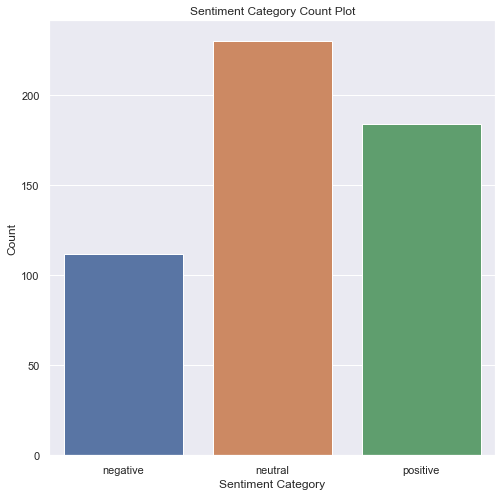

In [41]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.countplot(x="afinn_sent_category", data=data_clean)
plt.title('Sentiment Category Count Plot')
plt.ylabel('Count')
plt.xlabel('Sentiment Category')


L'affichage des 3 categories relativement au nombre de mots 

<AxesSubplot:xlabel='afinn_score', ylabel='word_count'>

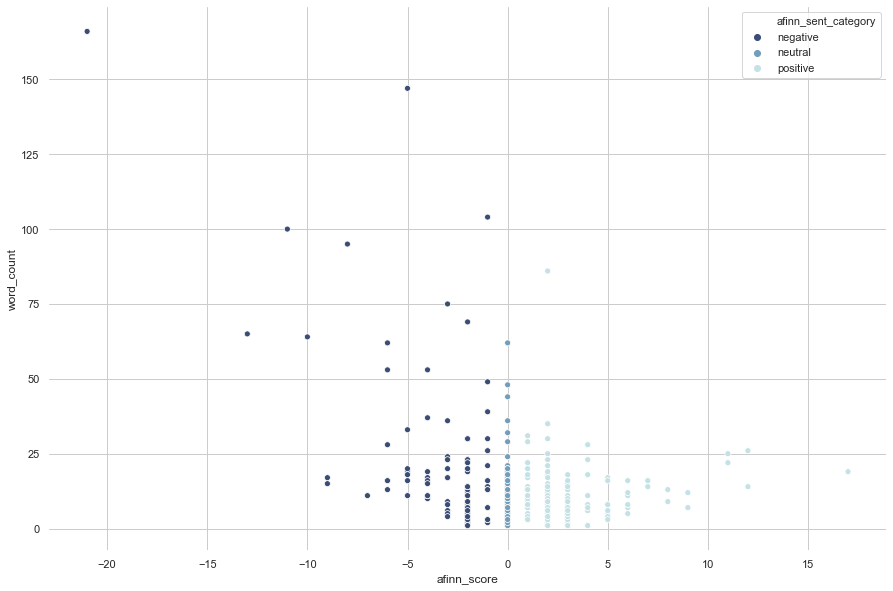

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="afinn_score", y="word_count", 
                hue="afinn_sent_category", 
                palette="ch:r=-.2,d=.3_r", 
                sizes=(1,8), 
                data=data_clean, ax=ax)

In [46]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


  The script wordcloud_cli.exe is installed in 'c:\users\user\appdata\local\programs\python\python37\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You are using pip version 19.0.3, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Extraction des mots negatifs dans les commentaires 

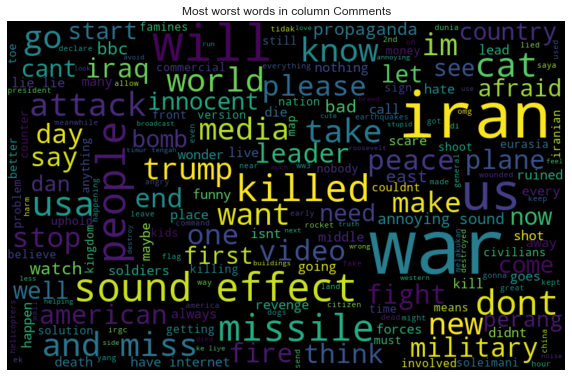

In [43]:
afinn_sent_category
negative_words = ' '.join([text for text in data_clean['Comments'][data_clean['afinn_score'] <0.0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most worst words in column Comments")
plt.show()

### Extraction des mots positifs dans les commentaires 


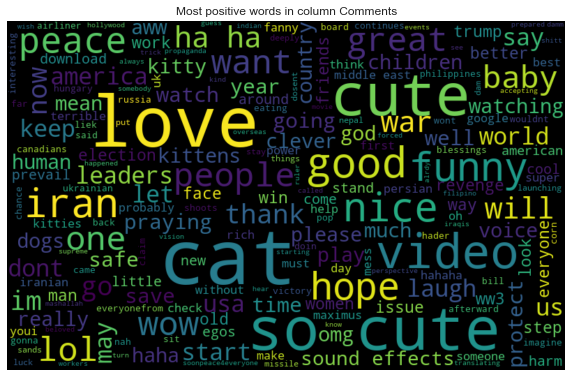

In [64]:
afinn_sent_category
positive_words = ' '.join([text for text in data_clean['Comments'][data_clean['afinn_score'] >0.0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most positive words in column Comments")
plt.axis('off')
plt.show()

### Extraction des mots neutres dans les commentaires 


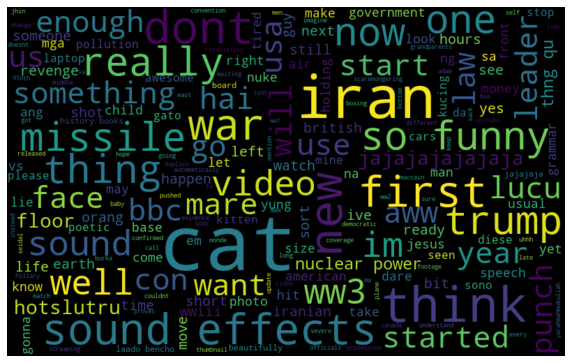

In [60]:
afinn_sent_category
all_words = ' '.join([text for text in data_clean['Comments'][data_clean['afinn_score'] == 0.0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Passons au Training et Testing

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
data_train, data_test = train_test_split(data_clean, test_size=0.2)

In [46]:
print(data_clean.shape)

(526, 5)


In [47]:
print(data_train.shape)

(420, 5)


In [48]:
print(data_test.shape)

(106, 5)


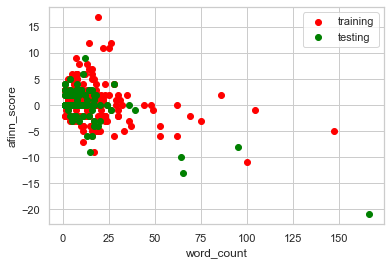

In [49]:
plt.scatter(data_train['word_count'], data_train['afinn_score'], color='red', label='training')
plt.scatter(data_test['word_count'], data_test['afinn_score'], color='green', label='testing')

plt.legend()
plt.xlabel('word_count')
plt.ylabel('afinn_score')

plt.show()

## Logistic Regression

In [57]:
X_train = data_train[['word_count','afinn_score']]
y_train = data_train['Comments']


X_test = data_test[['word_count','afinn_score']]
y_test = data_test['Comments']

In [ ]:
from sklearn.linear_model import LogisticRegression
# On realise l'objet du logistic regression
logisticRegr = LogisticRegression()
# On l'applique sur la data pour son entrainement 
logisticRegr.fit(X_train, y_train)

# TRAITEMENT DE DONNEES :

### heatmap:
C'est une représentation graphique de données où les valeurs individuelles contenues dans une matrice sont représentées en couleurs. C'est un peu comme si on regardait un tableau de données d'en haut. Il est vraiment utile d'afficher une vue générale des données numériques,utilisez l'analyse de cluster et permutez ainsi les lignes et les colonnes de la matrice pour placer des valeurs similaires les unes à côté des autres en fonction du clustering.

<AxesSubplot:>

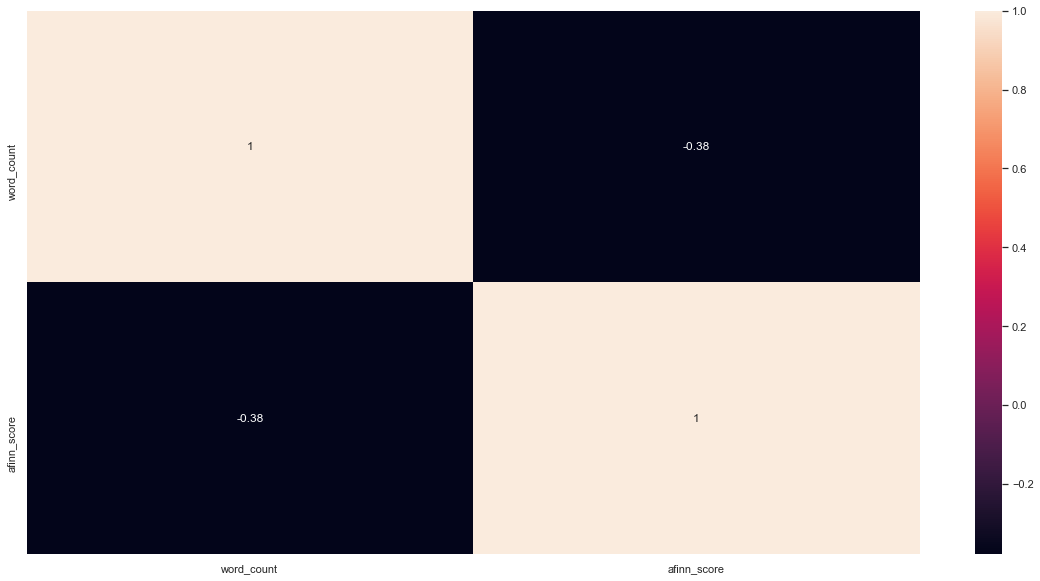

In [93]:
plt.figure(figsize = (20,10))  
sns.heatmap(data_clean.corr(),annot = True)

## LES COMMENTAIRES LES PLUS INFLUENTS

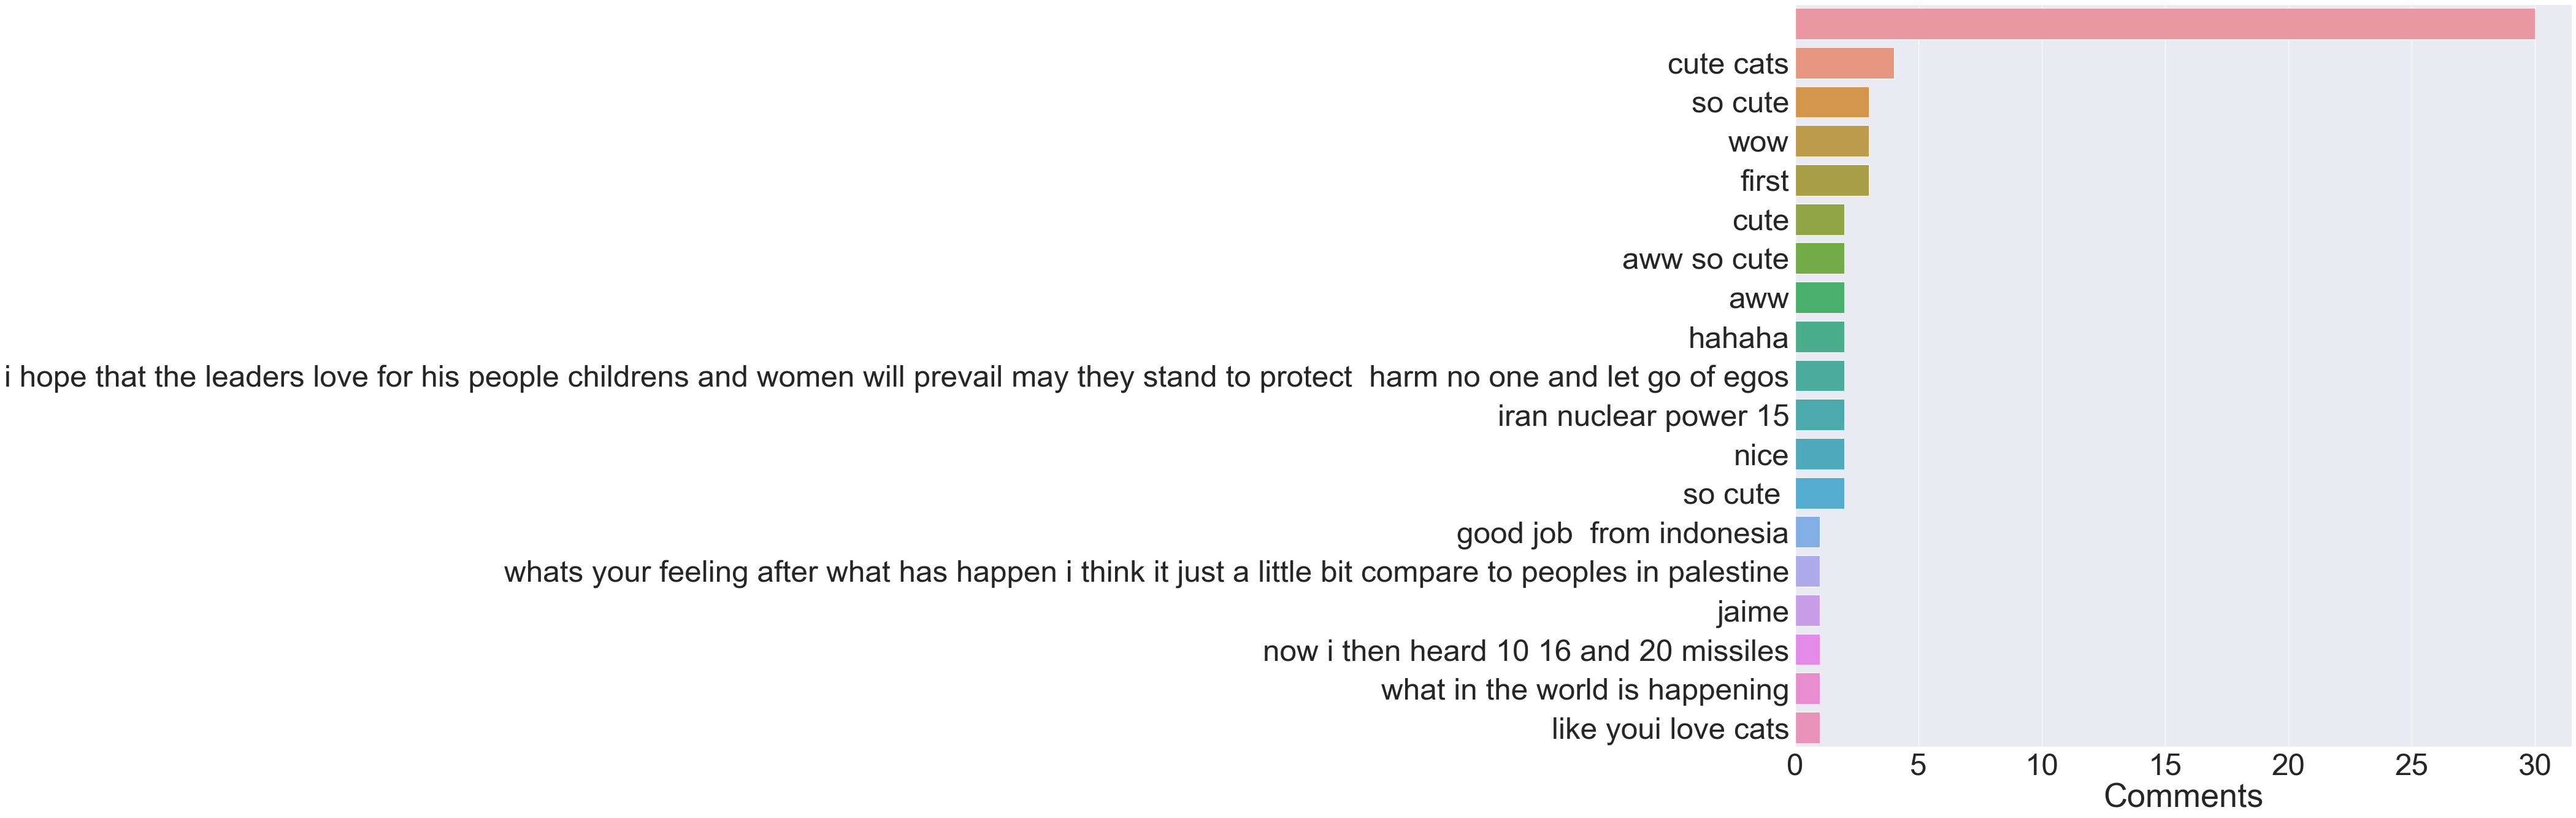

In [138]:
sns.set(font_scale=4.5,rc={'figure.figsize':(22.7,22.27)})
tmp = data_clean.Comments.value_counts()[:19]
_ = sns.barplot(y=tmp.index,x=tmp)

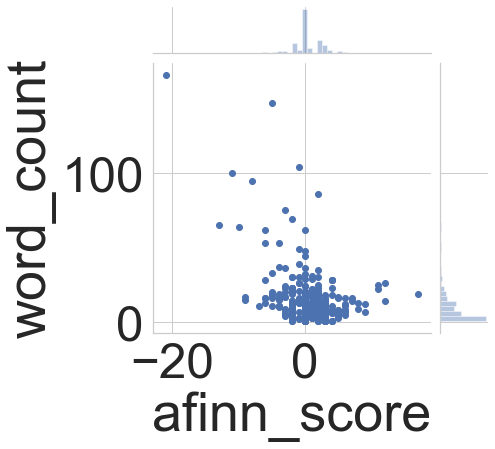

In [199]:
sns.jointplot(x=data_clean["afinn_score"], y=data["word_count"], kind='scatter')